In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from env import user, password, host
import env
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import wrangle
import wrangle_zillow
import explore

### Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In [2]:
#display all columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
#pull data
zillow = wrangle.wrangle_zillow()

Using cached data


In [6]:
zillow.head(1)

,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingclassdesc,buildingqualitytypeid,decktypeid,calculatedfinishedsquarefeet,fips,fireplacecnt,fireplaceflag,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,propertycountylandusecode,propertylandusetypeid,propertylandusedesc,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,roomcnt,threequarterbathnbr,typeconstructiontypeid,typeconstructiondesc,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,14297519,NaN,NaN,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,3100.0,6059.0,NaN,NaN,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,122,261.0,Single Family Residential,NaN,6.059063e+07,53571.0,1286.0,NaN,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01


In [7]:
zillow.shape

(77380, 46)

In [5]:
zillow = explore.get_single_unit(zillow)

In [6]:
zillow.shape

(71715, 46)

In [7]:
zillow = explore.handle_missing_values(zillow,prop_required_columns = .60,prop_required_row= .70)

In [11]:
zillow.shape

(71715, 27)

In [12]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71715 entries, 0 to 77379
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71715 non-null  int64  
 1   bathroomcnt                   71715 non-null  float64
 2   bedroomcnt                    71715 non-null  float64
 3   buildingqualitytypeid         44919 non-null  float64
 4   calculatedfinishedsquarefeet  71553 non-null  float64
 5   fips                          71715 non-null  float64
 6   latitude                      71715 non-null  float64
 7   longitude                     71715 non-null  float64
 8   lotsizesquarefeet             63604 non-null  float64
 9   propertycountylandusecode     71715 non-null  object 
 10  propertylandusetypeid         71715 non-null  float64
 11  propertylandusedesc           71715 non-null  object 
 12  propertyzoningdesc            45333 non-null  object 
 13  r

In [13]:
numerical_columns = [col for col in zillow.columns if col in zillow.select_dtypes(include = ["number"])]

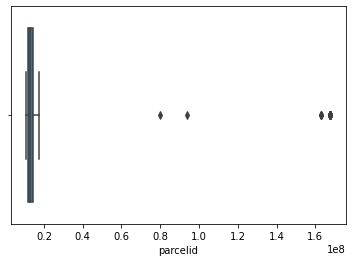

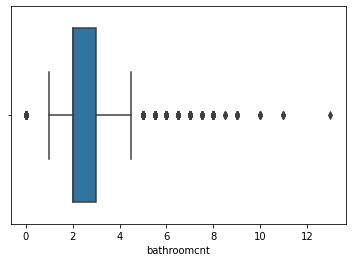

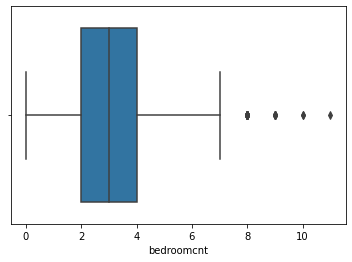

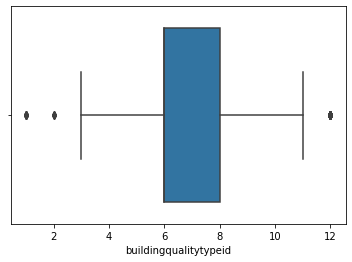

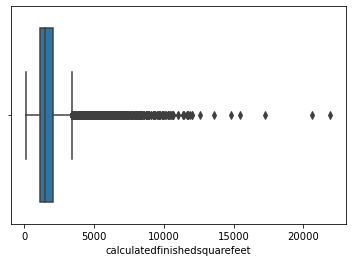

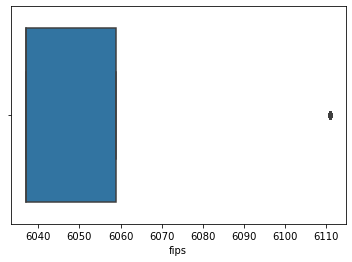

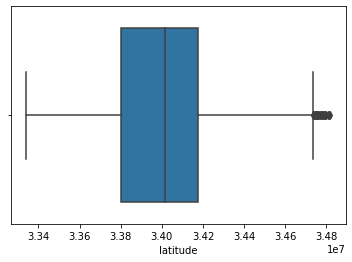

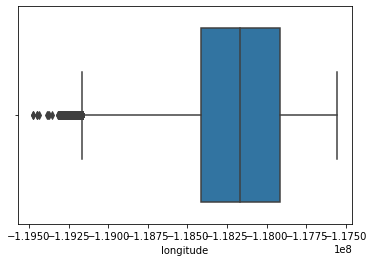

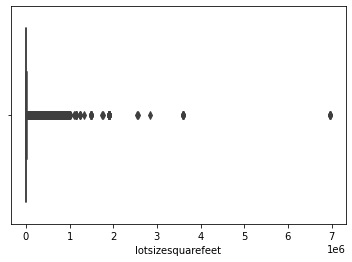

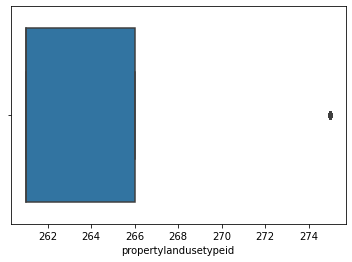

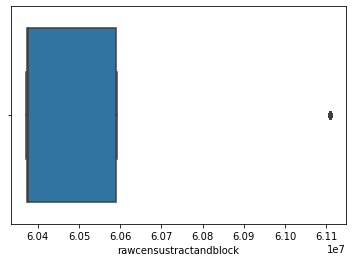

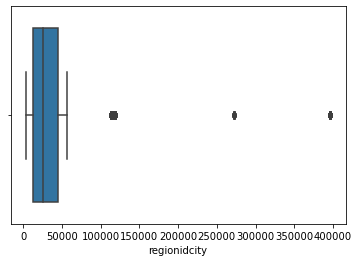

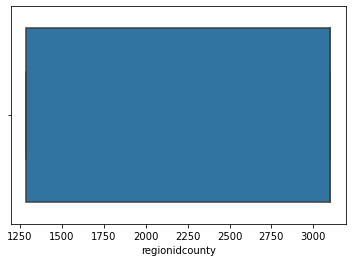

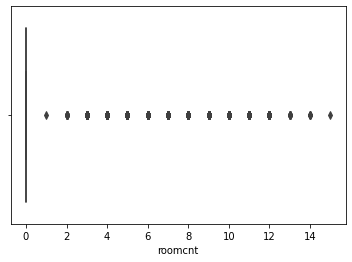

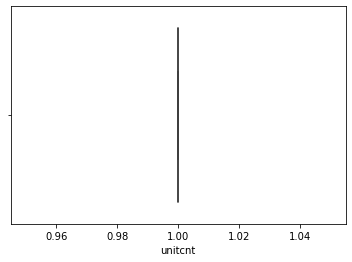

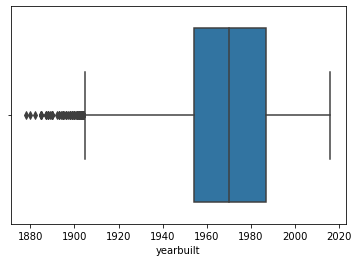

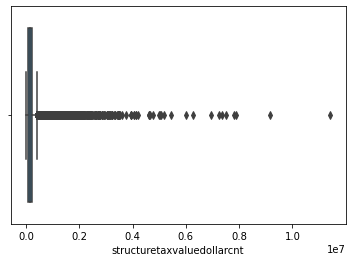

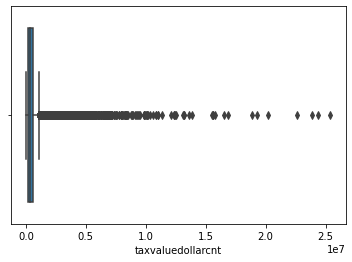

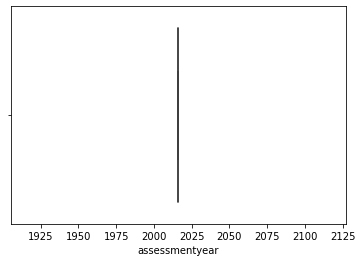

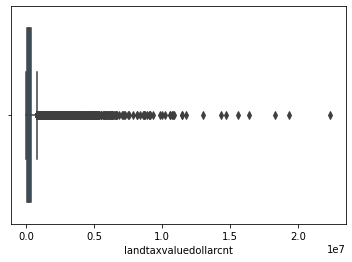

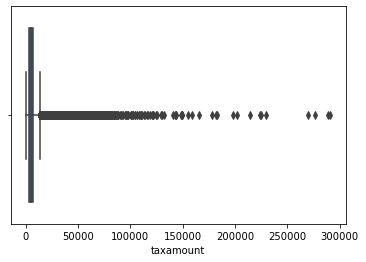

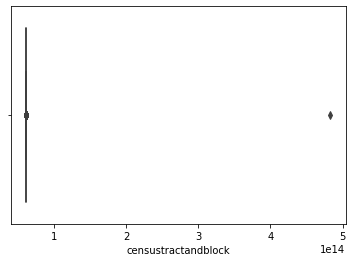

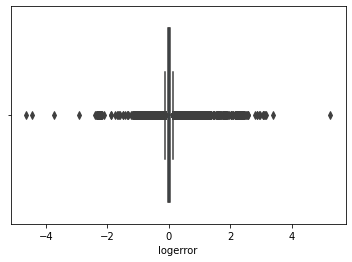

In [14]:
numerical_columns = [col for col in zillow.columns if col in zillow.select_dtypes(include = ["number"])]
for col in numerical_columns:
    sns.boxplot(zillow[col])
    plt.show()

In [8]:
zillow["tax_rate"]  = round(((zillow.taxamount/zillow.taxvaluedollarcnt) *100),0)

In [9]:
train, validate, test = wrangle_zillow.zillow_split(zillow)

train --> (40160, 28)
validate --> (17212, 28)
test --> (14343, 28)


how is logerror spread through lontiude and latitude?

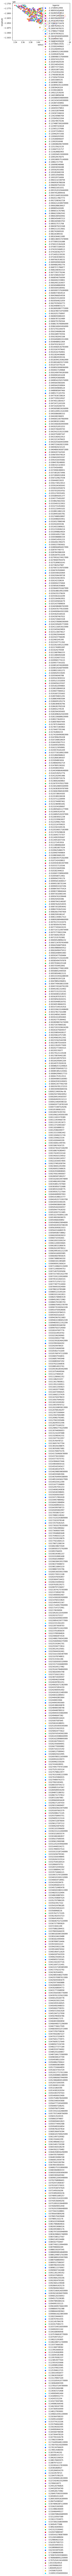

In [24]:
sns.scatterplot(data=train.sample(1000),x='latitude',y='longitude',hue = "logerror", palette = "bright")
plt.show()

    cant really tell

how is tax_rate and logerror relationship?

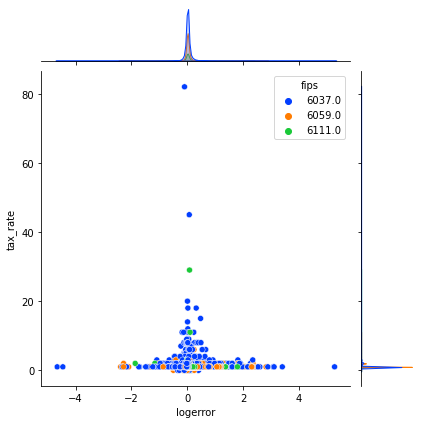

In [21]:
sns.jointplot(y="tax_rate", x="logerror", data=train, hue = 'fips', palette = "bright")
plt.xlabel("fips")
plt.ylabel("Logerror")
plt.show()

    logerrors are concentrated in lower tax rate it seems

how about tax_rate,regionidcity,lotsizesquarefeet and logerror?

In [16]:
x = ["tax_rate","regionidcity", "lotsizesquarefeet", "logerror"]


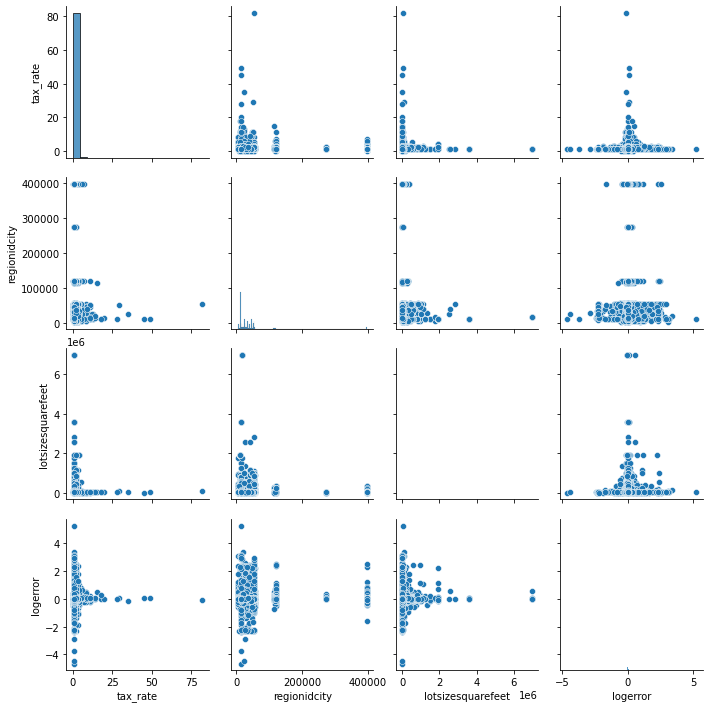

In [17]:
sns.pairplot(zillow[x])

how about all numeric columns?

In [33]:
train["county"] = train['fips'].map({6037.:'Los Angeles',6059.0:'Orange',6111.0:'Ventura'})

In [38]:
numerical_columns = [col for col in train.columns if col in train.select_dtypes(include = ["number"])]

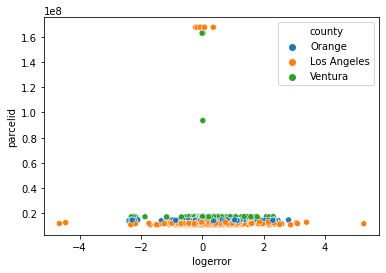

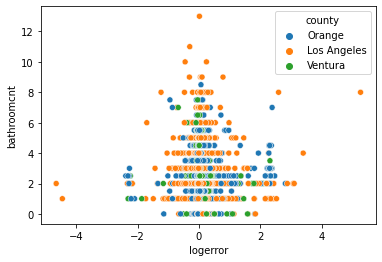

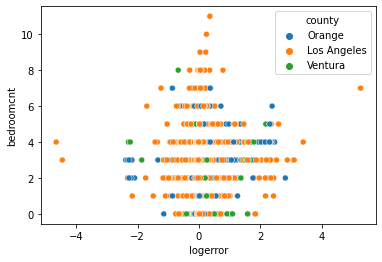

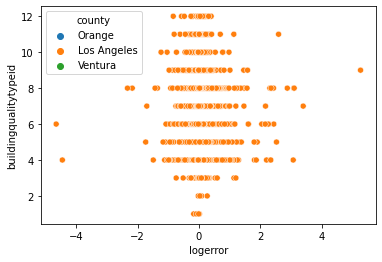

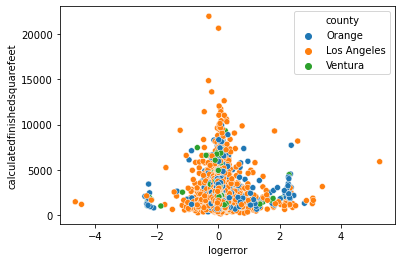

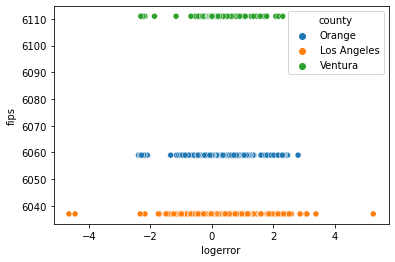

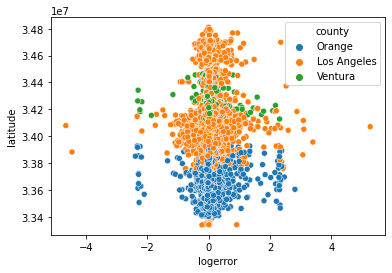

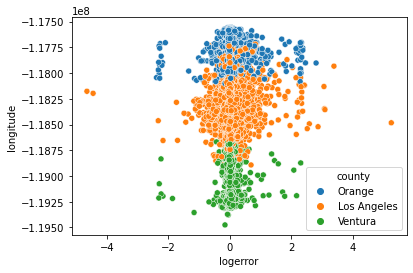

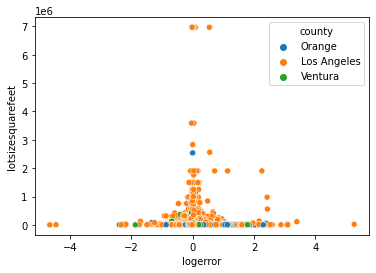

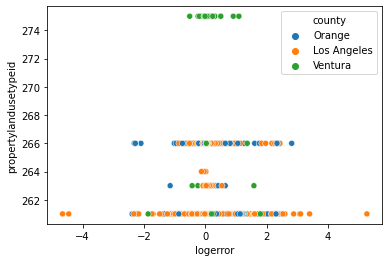

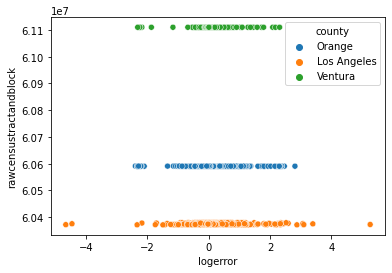

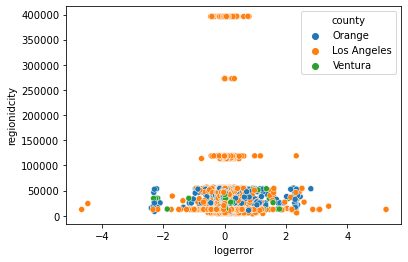

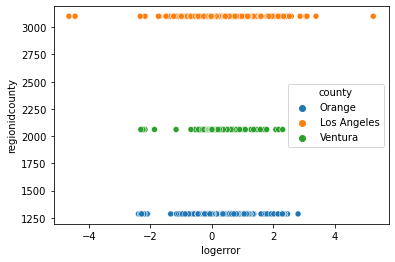

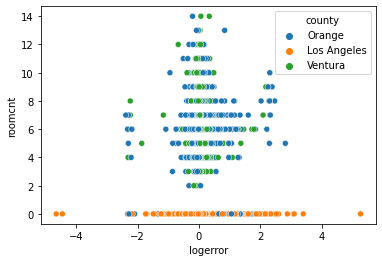

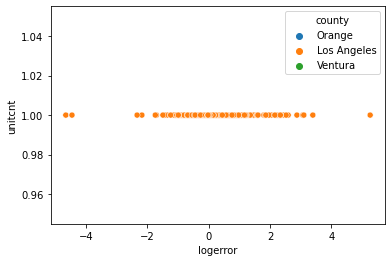

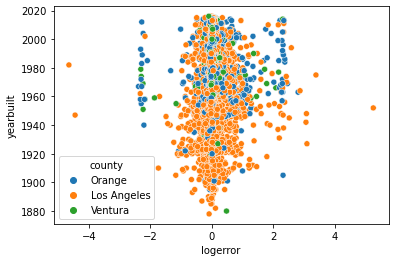

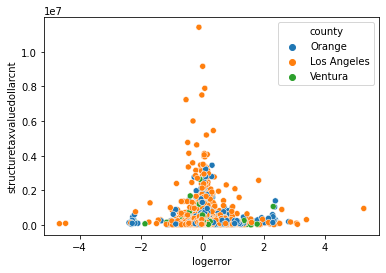

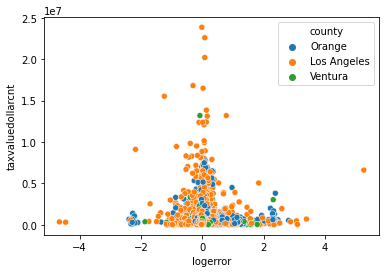

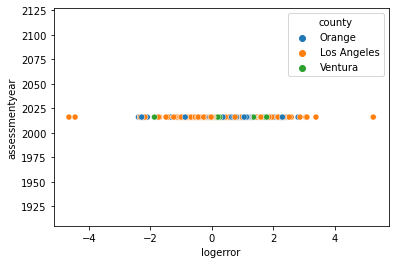

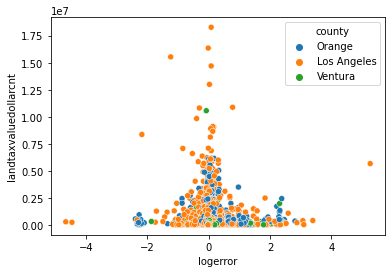

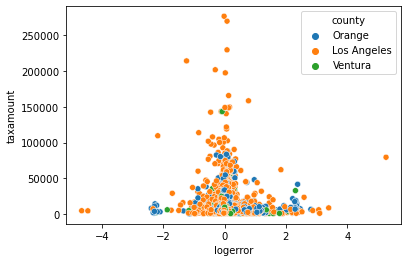

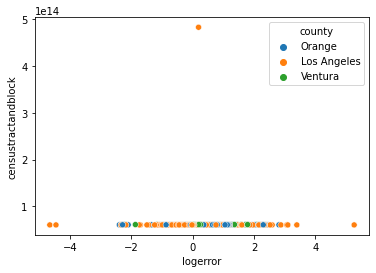

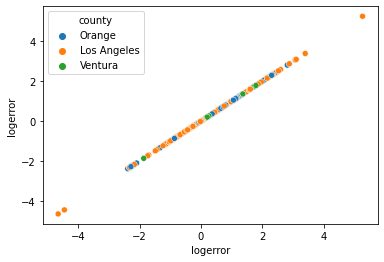

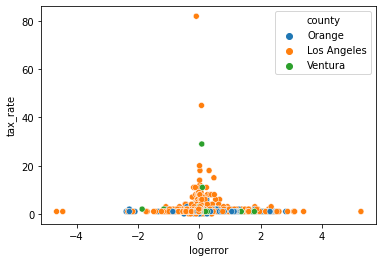

In [39]:
for col in zillow[numerical_columns]:
    sns.scatterplot(data = train, y = train[col], x= train.logerror, hue = "county")
    plt.show()

loggerror seems high in smaller properties, more in orange county, more in smaller lot size, more in lower tax rate and lower property value